In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\galir\Downloads\Police Shootings Age Race.csv")
df

,age,race
0,8,B
1,13,B
2,14,B
3,15,B
4,15,B
...,...,...
6049,84,W
6050,88,W
6051,88,W
6052,91,W


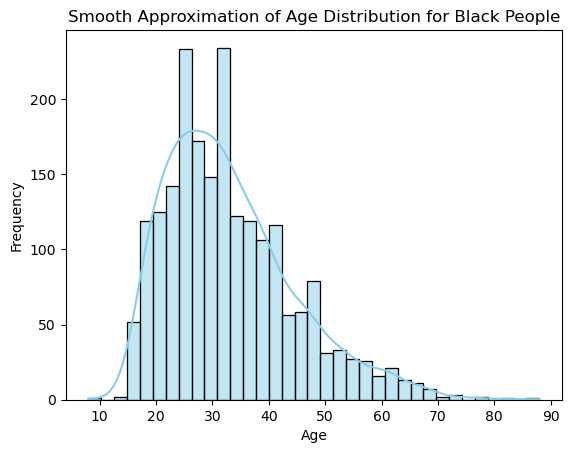

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering data for black people
black_people_df = df[df['race'] == 'B']

# Plot a smooth approximation of the histogram with kernel density estimate (KDE)
sns.histplot(data=black_people_df['age'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Smooth Approximation of Age Distribution for Black People')
plt.show()


In [4]:

from scipy.stats import skew, kurtosis

# Filtering data for Black people
black_people_df = df[df['race'] == 'B']

# Calculating statistics
minimum_age = black_people_df['age'].min()
maximum_age = black_people_df['age'].max()
median_age = black_people_df['age'].median()
mean_age = black_people_df['age'].mean()
skewness_age = skew(black_people_df['age'])
kurtosis_age = kurtosis(black_people_df['age'])

# Display the results
print(f"Minimum Age: {minimum_age}")
print(f"Maximum Age: {maximum_age}")
print(f"Median Age: {median_age}")
print(f"Mean Age: {mean_age}")
print(f"Skewness of Age: {skewness_age}")
print(f"Kurtosis of Age: {kurtosis_age}")



Minimum Age: 8
Maximum Age: 88
Median Age: 31.0
Mean Age: 33.04860442733398
Skewness of Age: 0.9471771630506532
Kurtosis of Age: 0.8262343866756972


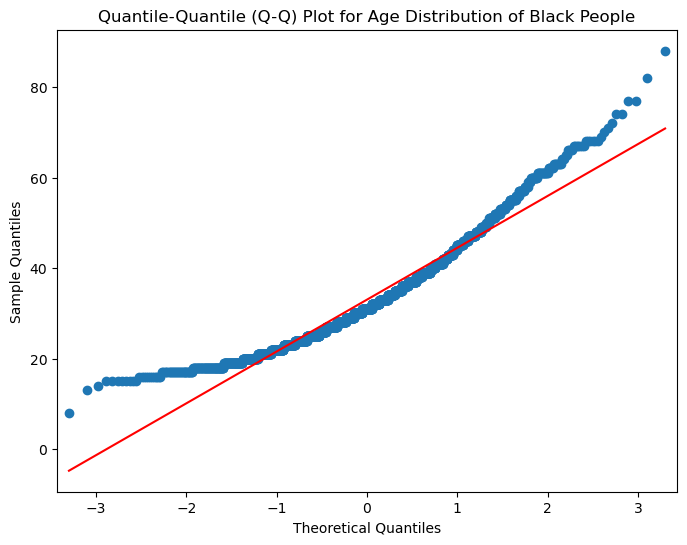

In [6]:
import statsmodels.api as sm
# Filtering data for black people 
black_people_df = df[df['race'] == 'B']

# Creating a quantile-quantile (Q-Q) plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(black_people_df['age'], line='s', ax=ax, color='skyblue')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile-Quantile (Q-Q) Plot for Age Distribution of Black People')
plt.show()

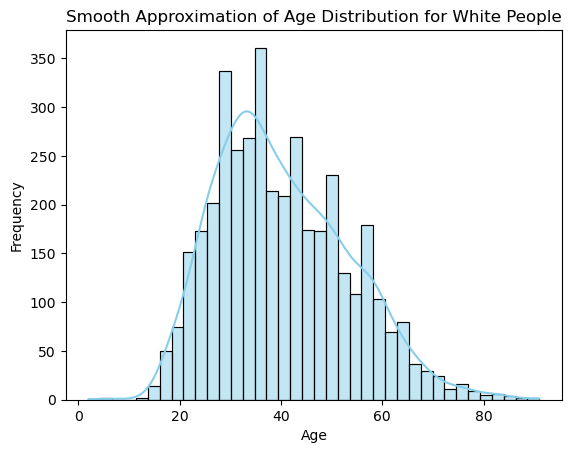

In [7]:
# Filtering data for white people
white_people_df = df[df['race'] == 'W']

# Plot a smooth approximation of the histogram with kernel density estimate (KDE)
sns.histplot(data=white_people_df['age'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Smooth Approximation of Age Distribution for White People')
plt.show()

In [18]:
from scipy.stats import skew, kurtosis

# Filtering data for White people 
white_people_df = df[df['race'] == 'W']

# Calculate statistics
minimum_age = white_people_df['age'].min()
maximum_age = white_people_df['age'].max()
median_age = white_people_df['age'].median()
mean_age = white_people_df['age'].mean()
skewness_age = skew(white_people_df['age'])
kurtosis_age = kurtosis(white_people_df['age'])

# Display the results
print(f"Minimum Age: {minimum_age}")
print(f"Maximum Age: {maximum_age}")
print(f"Median Age: {median_age}")
print(f"Mean Age: {mean_age}")
print(f"Skewness of Age: {skewness_age}")
print(f"Kurtosis of Age: {kurtosis_age}")



Minimum Age: 2
Maximum Age: 91
Median Age: 38.0
Mean Age: 40.270875251509054
Skewness of Age: 0.5420546838752048
Kurtosis of Age: -0.05525599125498548


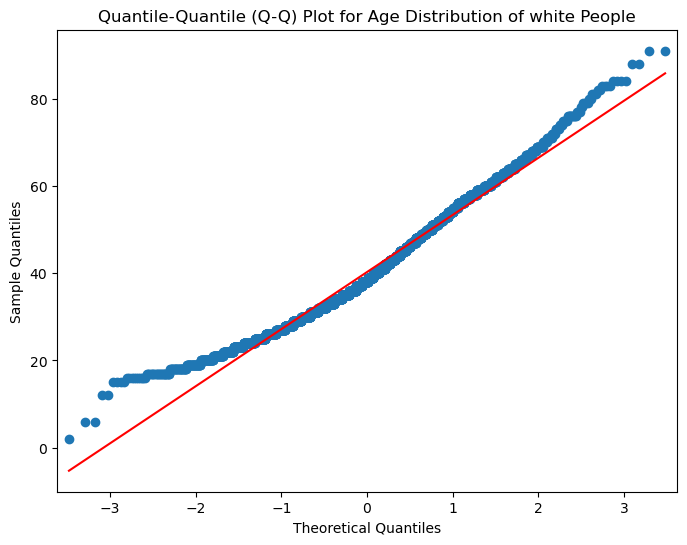

In [20]:
import statsmodels.api as sm
# Filtering data for white people 
white_people_df = df[df['race'] == 'W']

# Creating a quantile-quantile (Q-Q) plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(white_people_df['age'], line='s', ax=ax, color='skyblue')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile-Quantile (Q-Q) Plot for Age Distribution of white People')
plt.show()

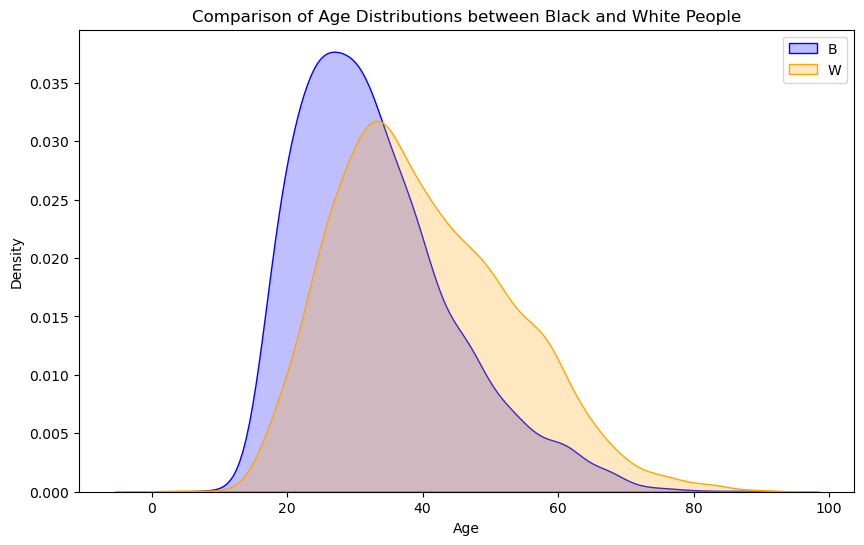

In [21]:
# Filtering data for Black and White people 
black_people_df = df[df['race'] == 'B']
white_people_df = df[df['race'] == 'W']

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot overlapping kernel density estimates
sns.kdeplot(black_people_df['age'], label='B', color='blue', fill=True)
sns.kdeplot(white_people_df['age'], label='W', color='orange', fill=True)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Comparison of Age Distributions between Black and White People')
plt.legend()
plt.show()

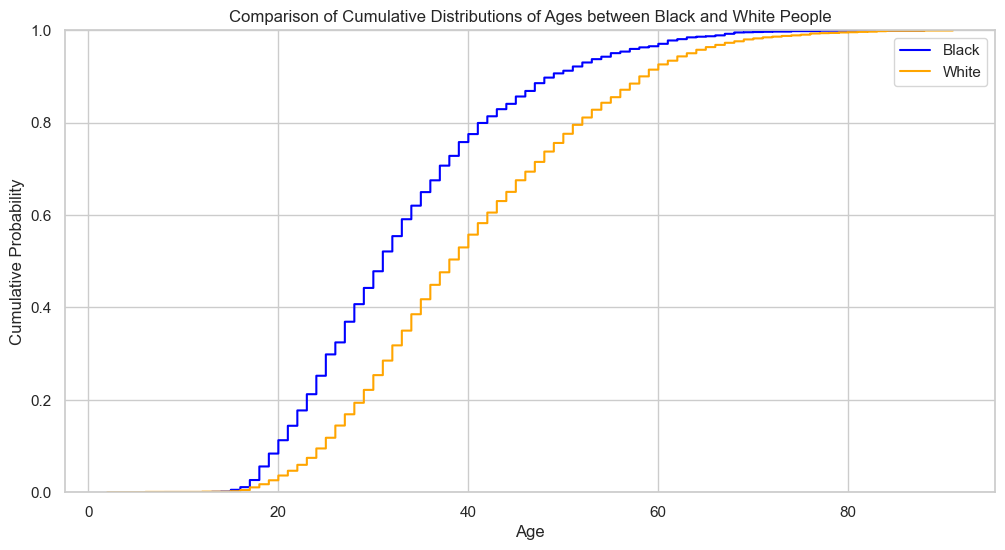

In [37]:
# Filtering data for Black and White people
black_people_df = df[df['race'] == 'B']
white_people_df = df[df['race'] == 'W']

# Set up the plotting parameters
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Creating cumulative distribution plots for Black and White people's ages
sns.ecdfplot(data=black_people_df, x='age', label='Black', color='blue')
sns.ecdfplot(data=white_people_df, x='age', label='White', color='orange')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Cumulative Distributions of Ages between Black and White People')

# Show the plot
plt.legend()
plt.show()

In [32]:
import numpy as np
from scipy.stats import ttest_ind
# Separate data for Black and White people
black_people_df = df[df['race'] == 'B']
white_people_df = df[df['race'] == 'W']

# Calculating mean and standard deviation for each group
mean_age_black = black_people_df['age'].mean()
mean_age_white = white_people_df['age'].mean()
std_dev_black = black_people_df['age'].std()
std_dev_white = white_people_df['age'].std()

# Calculating Cohen's d
pooled_std_dev = np.sqrt(((len(black_people_df) - 1) * std_dev_black**2 + (len(white_people_df) - 1) * std_dev_white**2) / (len(black_people_df) + len(white_people_df) - 2))
cohen_d = (mean_age_white - mean_age_black) / pooled_std_dev

# Display Cohen's d
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.5754223321506542


In [33]:
# Performing t-test
t_statistic, p_value = ttest_ind(black_people_df['age'], white_people_df['age'], equal_var=False)

# Display the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for statistical significance (common significance level is 0.05)
alpha = 0.05
if p_value < alpha:
    print("The mean age difference is statistically significant.")
else:
    print("The mean age difference is not statistically significant.")

T-Statistic: -22.167088968650308
P-Value: 1.1450337917863026e-103
The mean age difference is statistically significant.


In [47]:
# Extracting age data for black and white people
black_age_data = df[df['race'] == 'B']['age']
white_age_data = df[df['race'] == 'W']['age']

# Calculate the observed test statistic
observed_statistic = np.mean(white_age_data) - np.mean(black_age_data)

num_permutations = 1000

# Initializing an array to store permutation test statistics
perm_test_statistics = np.zeros(num_permutations)

# Permutation test
for i in range(num_permutations):
    # Concatenate the data and shuffle
    combined_data = np.concatenate((black_age_data, white_age_data))
    np.random.shuffle(combined_data)

    # Split the permuted data into black and white groups
    perm_black_data = combined_data[:len(black_age_data)]
    perm_white_data = combined_data[len(black_age_data):]

    # Calculate the test statistic for the permuted data
    perm_test_statistics[i] = np.mean(perm_black_data) - np.mean(perm_white_data)

# Calculating p-value
p_value = (np.abs(perm_test_statistics) >= np.abs(observed_statistic)).mean()

# Print the result
print(f"Observed Statistic: {observed_statistic}")
print(f"P-value: {p_value}")

Observed Statistic: 7.222270824175077
P-value: 0.0
